In [8]:
import cv2
import time
import numpy as np
import mediapipe as mp

In [9]:
# 홍채 좌표 리스트
LEFT_IRIS = [474,475, 476, 477]
RIGHT_IRIS = [469, 470, 471, 472]

# 눈꺼풀 좌표 리스트
LEFT_EYE =[ 362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385,384, 398 ]
RIGHT_EYE=[ 33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161 , 246 ]

In [35]:
mp_face_mesh = mp.solutions.face_mesh
frame_path = '/opt/ml/data_input/images/test_01.jpg'

frame = cv2.imread(frame_path)

start_time = time.time()

with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.6,
    min_tracking_confidence=0.6
) as face_mesh:
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)
    #getting width and height or frame
    img_h, img_w = frame.shape[:2]

end_time = time.time()

execution_time = end_time - start_time
# 결과 출력
print(f"코드 실행 시간: {execution_time:.6f} 초")
    

코드 실행 시간: 0.045667 초


In [11]:
mesh_points=np.array([np.multiply([p.x, p.y], [img_w, img_h]).astype(int) for p in results.multi_face_landmarks[0].landmark])

array([[310, 194],
       [312, 177],
       [312, 180],
       [309, 156],
       [312, 171],
       [313, 163],
       [314, 143],
       [280, 136],
       [315, 130],
       [315, 123],
       [317,  94],
       [310, 196],
       [310, 197],
       [310, 198],
       [310, 198],
       [310, 200],
       [310, 203],
       [309, 205],
       [310, 210],
       [312, 179],
       [306, 178],
       [260, 113],
       [294, 142],
       [289, 142],
       [284, 142],
       [278, 138],
       [298, 141],
       [286, 126],
       [292, 127],
       [281, 127],
       [278, 129],
       [273, 141],
       [290, 218],
       [278, 134],
       [256, 137],
       [267, 136],
       [287, 166],
       [303, 193],
       [304, 196],
       [297, 193],
       [293, 193],
       [298, 196],
       [294, 195],
       [287, 199],
       [308, 176],
       [307, 170],
       [270, 125],
       [299, 153],
       [295, 171],
       [296, 168],
       [272, 163],
       [308, 163],
       [282,

In [12]:
cv2.polylines(frame, [mesh_points[LEFT_IRIS]], True, (255,0,0), 1, cv2.LINE_AA)
cv2.polylines(frame, [mesh_points[RIGHT_IRIS]], True, (255,0,0), 1, cv2.LINE_AA)

cv2.polylines(frame, [mesh_points[LEFT_EYE]], True, (0,255,0), 1, cv2.LINE_AA)
cv2.polylines(frame, [mesh_points[RIGHT_EYE]], True, (0,255,0), 1, cv2.LINE_AA)

# cv2.polylines(frame, [mesh_points], True, (0,255,0), 1, cv2.LINE_AA)


array([[[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [192, 192, 192],
        [192, 192, 192],
        [192, 192, 192]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [192, 192, 192],
        [192, 192, 192],
        [192, 192, 192]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [192, 192, 192],
        [192, 192, 192],
        [192, 192, 192]],

       ...,

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [210, 210, 210],
        [210, 210, 210],
        [210, 210, 210]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [210, 210, 210],
        [210, 210, 210],
        [210, 210, 210]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [210, 210, 210],
        [210, 210, 210],
        [210, 210, 210]]

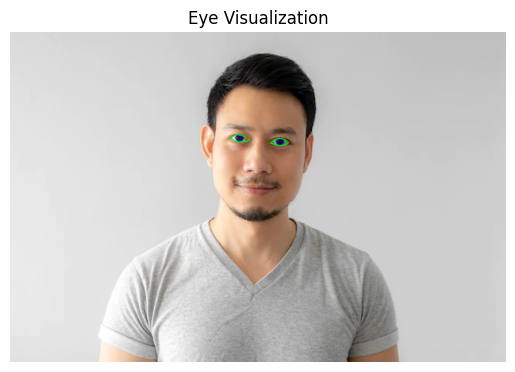

In [14]:
import matplotlib.pyplot as plt

# OpenCV에서 읽어온 BGR 이미지를 RGB로 변환
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# 이미지 시각화
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Eye Visualization')
plt.show()